# Milestone 1 

## Author: Era Ebhodaghe

### Topic: Customer Subscription

#### Data source https://www.kaggle.com/datasets/bhadramohit/customer-shopping-latest-trends-dataset

#### Project Description

For this project, I will be working as a data scientist for XYZ Company, which is currently in the process of planning its annual budget for the upcoming fiscal year. My primary objective is to evaluate various aspects of the business by analyzing their sales report. This analysis aims to identify key areas where the company should allocate resources to drive growth, improve customer retention, enhance customer satisfaction, and ultimately boost overall profitability. I will also be predicting the tendency for customers to get a subscription.

Using the insights gained from the analysis, I will make data-driven recommendations for investments. These recommendations may include strategies such as targeted marketing campaigns tailored to specific age groups or genders, promotional offers based on customer purchase history, or operational improvements designed to address customer feedback and satisfaction. By focusing on these areas, the company can optimize its operations and make informed decisions that align with its goals.

To achieve this, the exploratory data analysis (EDA) phase will commence with rigorous data cleaning to ensure accuracy and reliability. Clean data is essential for uncovering meaningful patterns and relationships within the dataset. Following this, I will visualize key variables individually and in combination to gain a deeper understanding of the data. This step will highlight trends, correlations, and insights that might otherwise remain hidden in raw figures.

The project will follow an iterative approach, with each milestone building upon the findings of the previous phase. This methodology allows for flexibility and adjustments as new discoveries emerge during the analysis process. I anticipate making modifications to my approach and recommendations based on these findings, ensuring the final insights are comprehensive and actionable.
This project will serve as a strategic guide to help XYZ Company prioritize investments that maximize returns while enhancing customer experiences and business efficiency.


## Milestone 1

In [49]:
#importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [67]:
#loading dataset
df = pd.read_csv('/Users/valuedcustomer/Downloads/shopping_trends.csv')
df.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [74]:
sns.barplot(data=df, x="Subscription Status", y="

SyntaxError: unterminated string literal (detected at line 1) (727328155.py, line 1)

#### Plot #1 - Preferred Payment Method Distribution

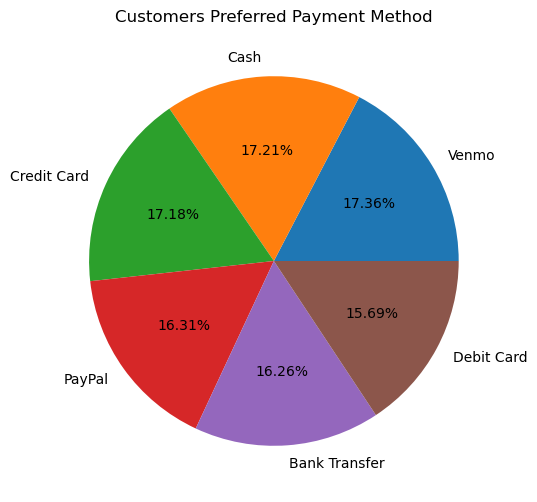

In [77]:
#Plot 1 - Preferred Payment Method Distribution
plt.figure(figsize = (8,6))
plt.pie(df['Preferred Payment Method'].value_counts(), labels = df['Preferred Payment Method'].unique(), autopct = '%1.2f%%')
plt.title('Customers Preferred Payment Method')
plt.show()

#### Plot #2 - Gender Distribution

Text(0, 0.5, 'Count')

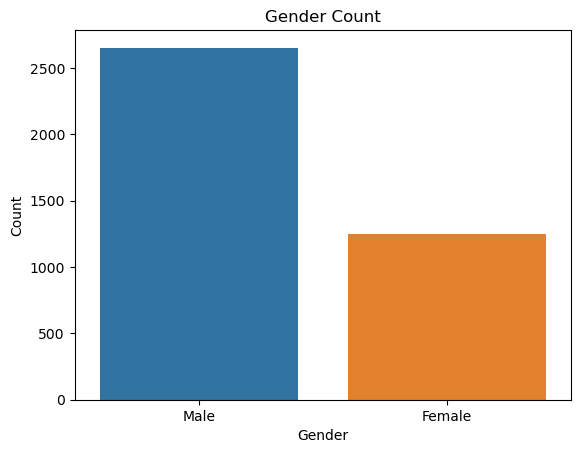

In [80]:
sns.countplot(data = df, x = 'Gender', hue = 'Gender')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')

In [82]:
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

#### Plot #3 - Category Count Plot

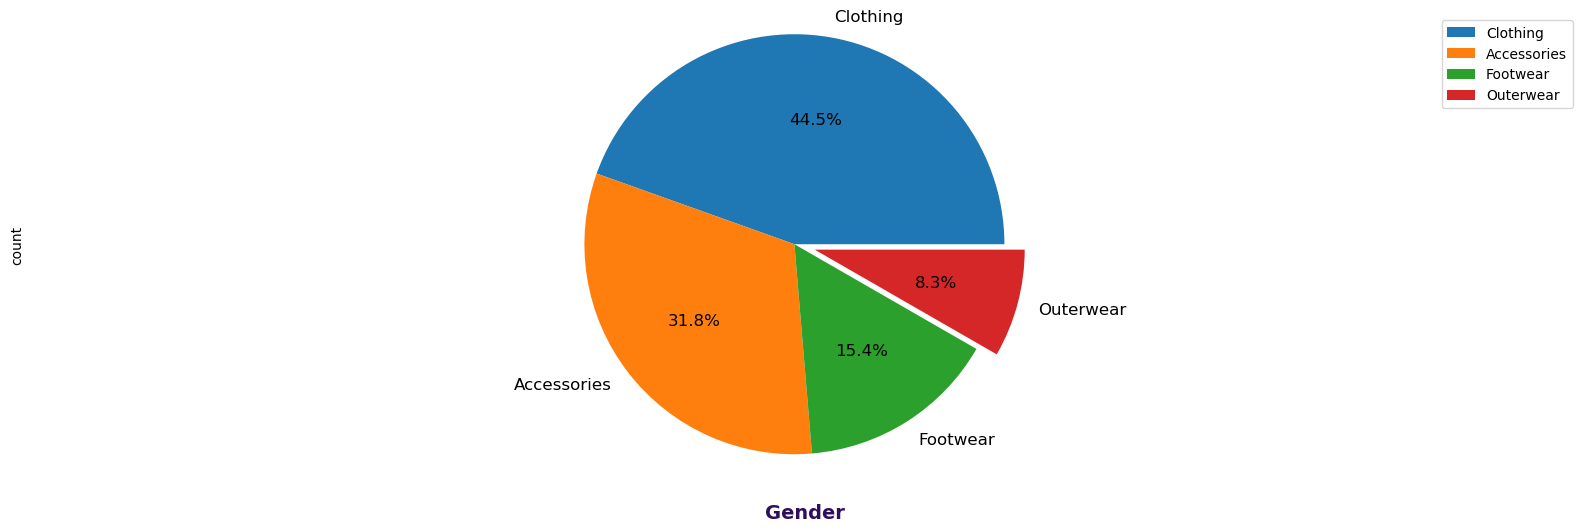

In [85]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [87]:
df.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly


#### Plot #4 - Box plot of Product Review Rating and Category

<Axes: xlabel='Category', ylabel='Review Rating'>

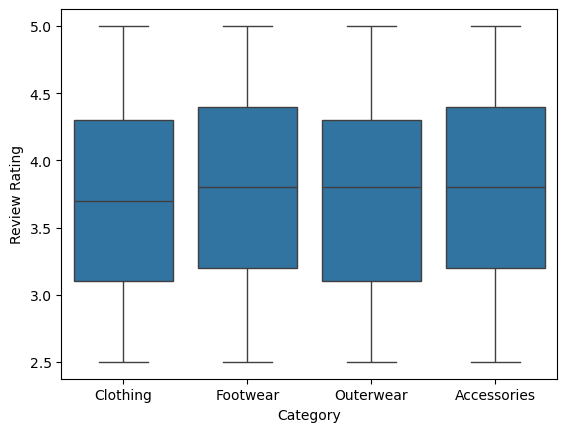

In [90]:
sns.boxplot(data=df, x="Category", y="Review Rating")

#### Plot #5 - Age Distribution

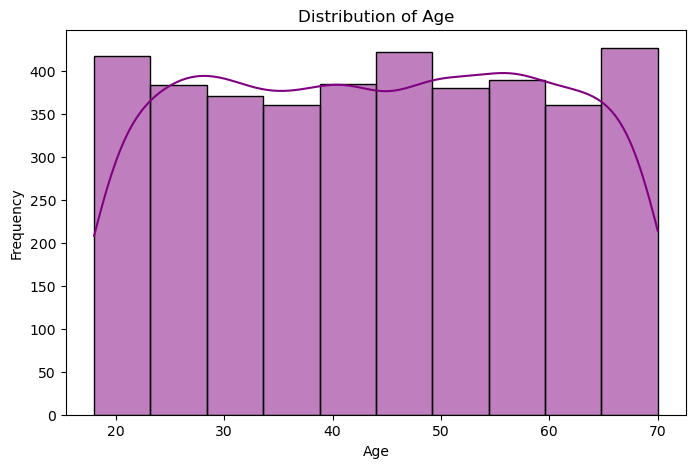

In [93]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True, color='purple')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### <ins>Summary</ins>

#### Plot 1 - This shows a pie chart of customers' preferred payment method. Based on the plot, the preferrences for pay payment methods available are almost equally distributed.

#### Plot 2 - The plot for gender shows that there are more male customers than female customers. Based on this plot, a targeted ad or marketing campaign geared towards male customers in order to increase overall sales would be ideal.

#### Plot 3 - The pie chart shows distribution of product categories with clothing being the largest and outerwear being the smallest. 

#### Plot 4 - This box plot shows the spread of the product reviews across different categories. The data could help product managers identify areas of improvement based on customer ratings. Based on the plot, customers who purchased footwear and accessories had a higher review rating than customers who purchased clothing and outerwear. 

#### Plot 5 - This histogram plot shows the age distribution of customers which fairly even with peaks at early 20s, late 40s and late 60s.

# Milestone 2

In [98]:
df['Subscription Status'].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

### Data Exploration

#### I will commence data exploration by examining the number of rows in the dataset and analyzing the number of missing values

In [102]:
# number of rows in dataset

print("Sales dataset consists of {rows} rows.".format(rows = len(df)))

Sales dataset consists of 3900 rows.


In [104]:
#find percentage of missing values for each column
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

#### There are no missing values in the dataset

### Exploring Categorical Columns

In [108]:
df.select_dtypes(include=['object']).columns.tolist()

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Payment Method',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Preferred Payment Method',
 'Frequency of Purchases']

In [110]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())

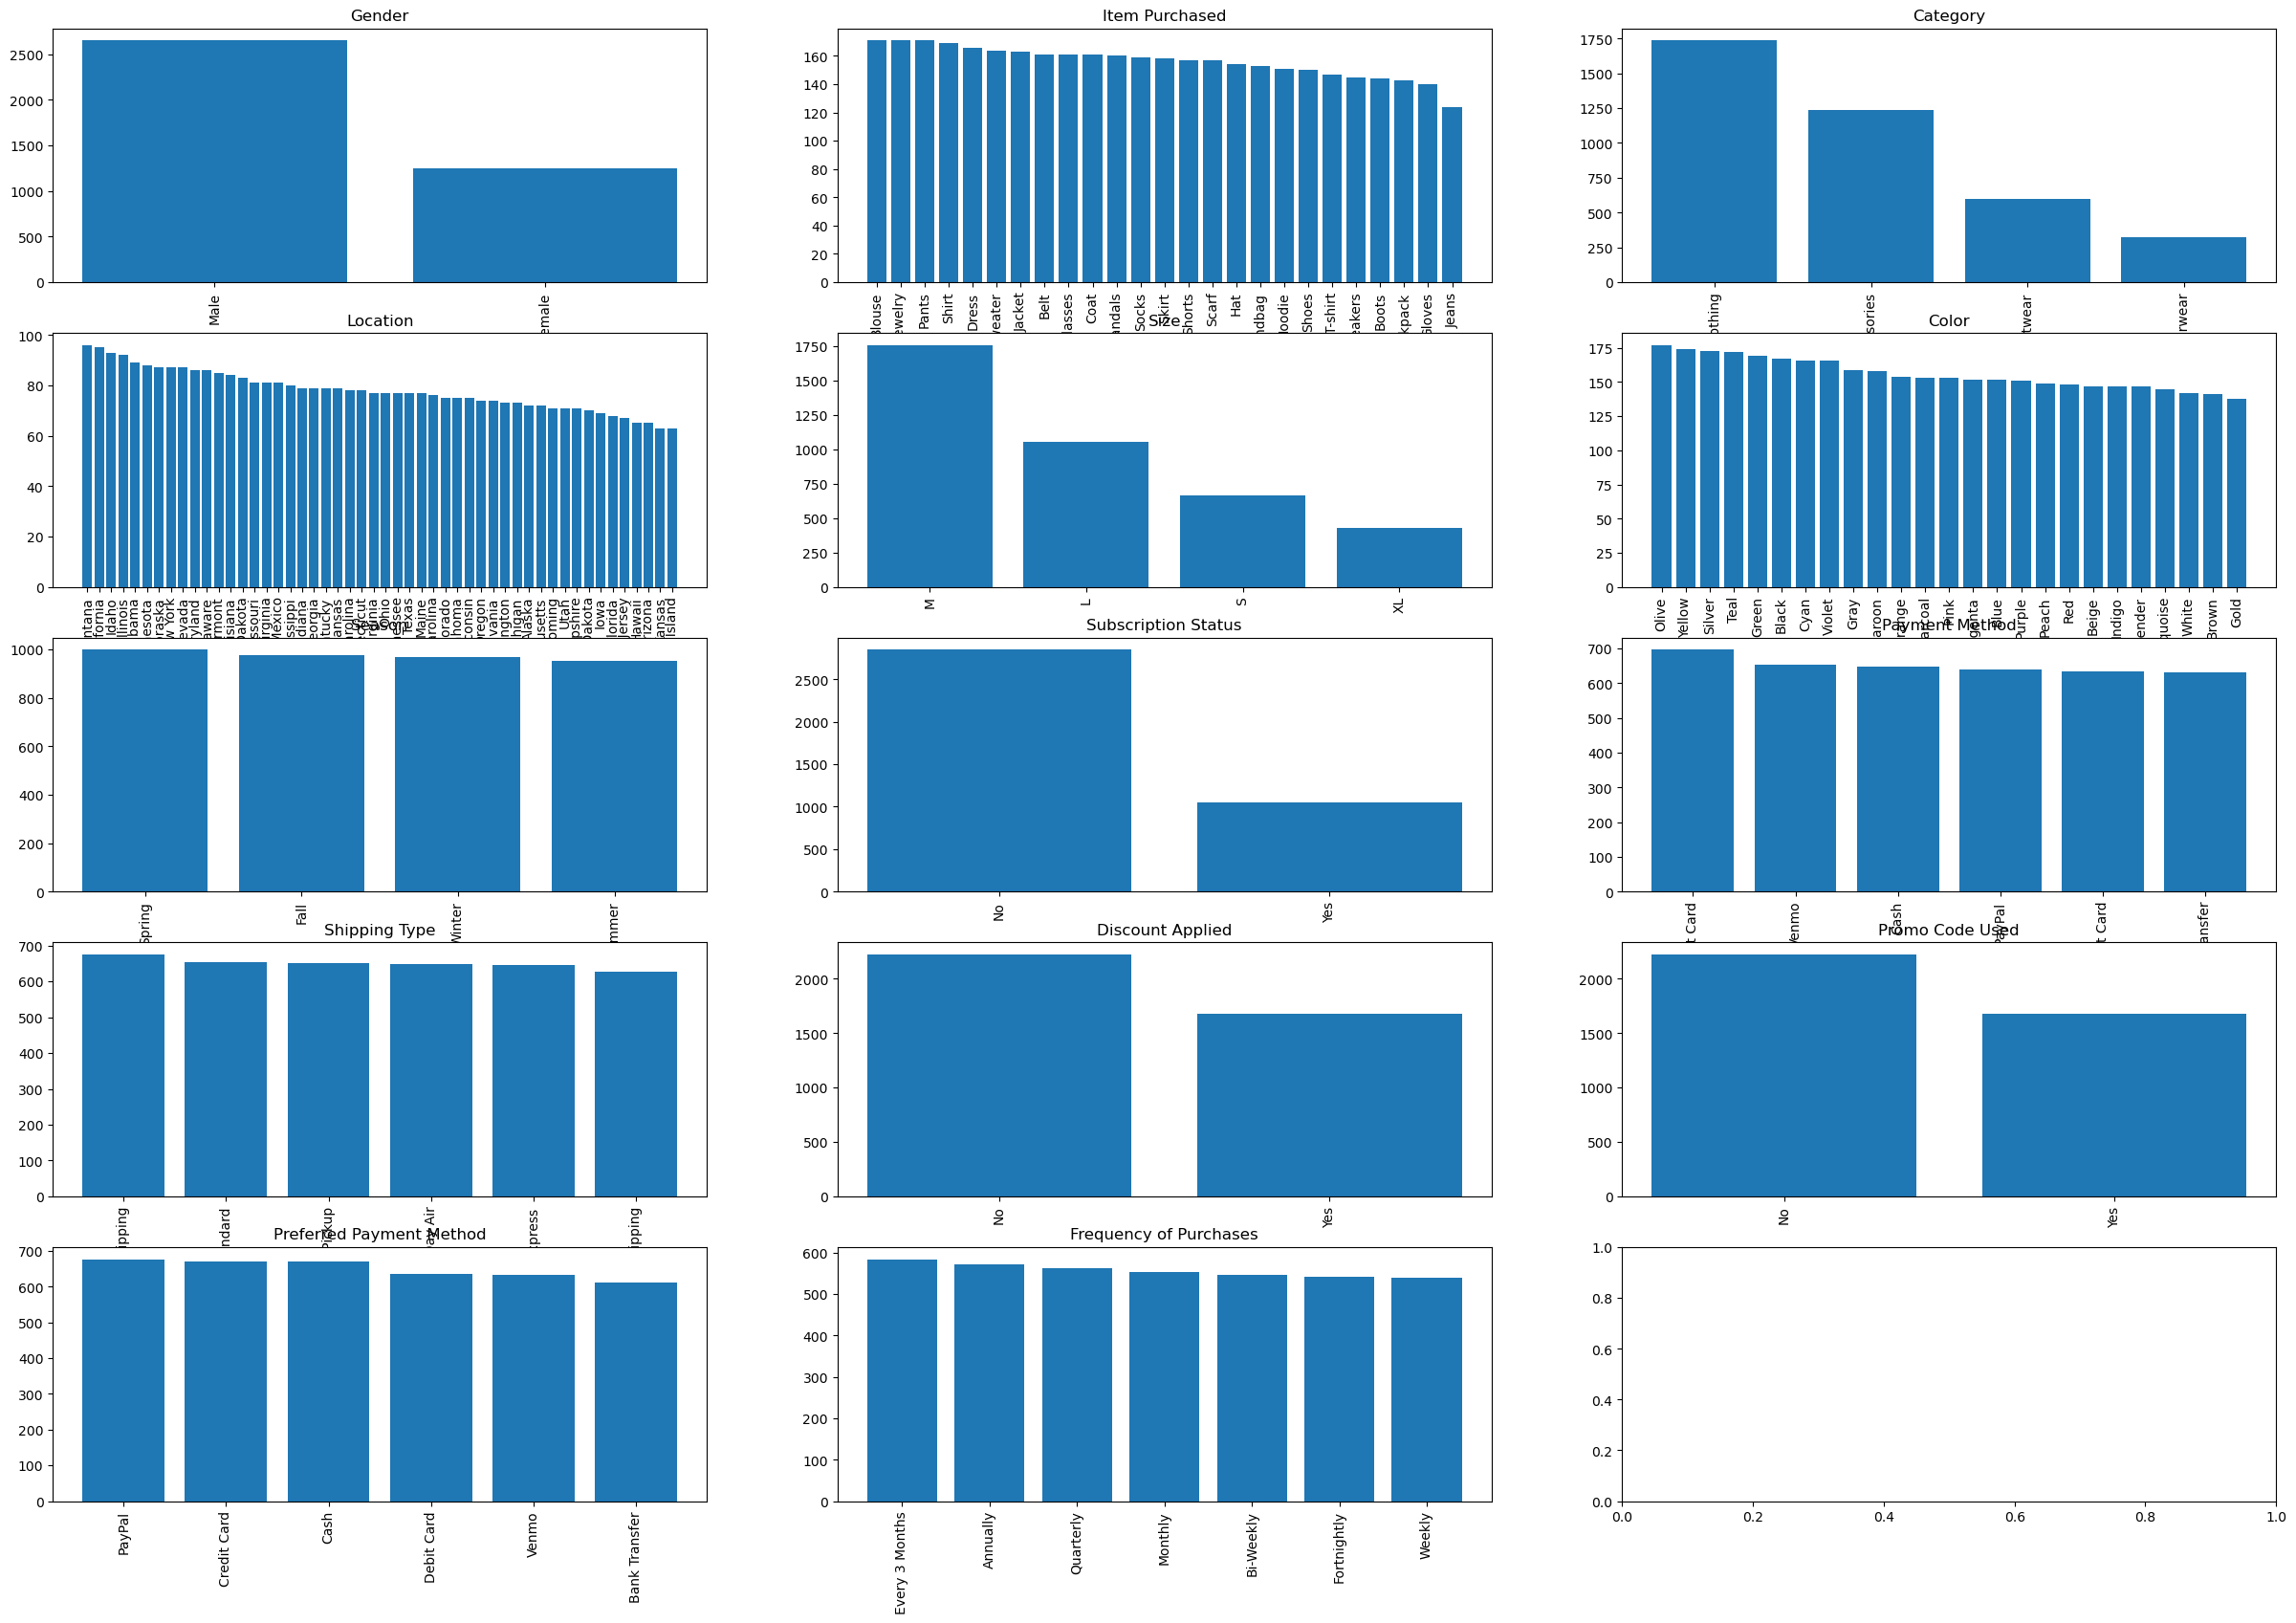

In [112]:
cat_columns = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season','Subscription Status',
              'Payment Method','Shipping Type', 'Discount Applied', 'Promo Code Used','Preferred Payment Method','Frequency of Purchases']

fig, axs = plt.subplots(5,3, sharex=False, sharey=False, figsize=(30, 20))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

### Exploring Numerical Columns

In [115]:
df.select_dtypes(exclude=['object']).columns.tolist()

['Customer ID',
 'Age',
 'Purchase Amount (USD)',
 'Review Rating',
 'Previous Purchases']

#### Plotting histograms to explore the numerical column values

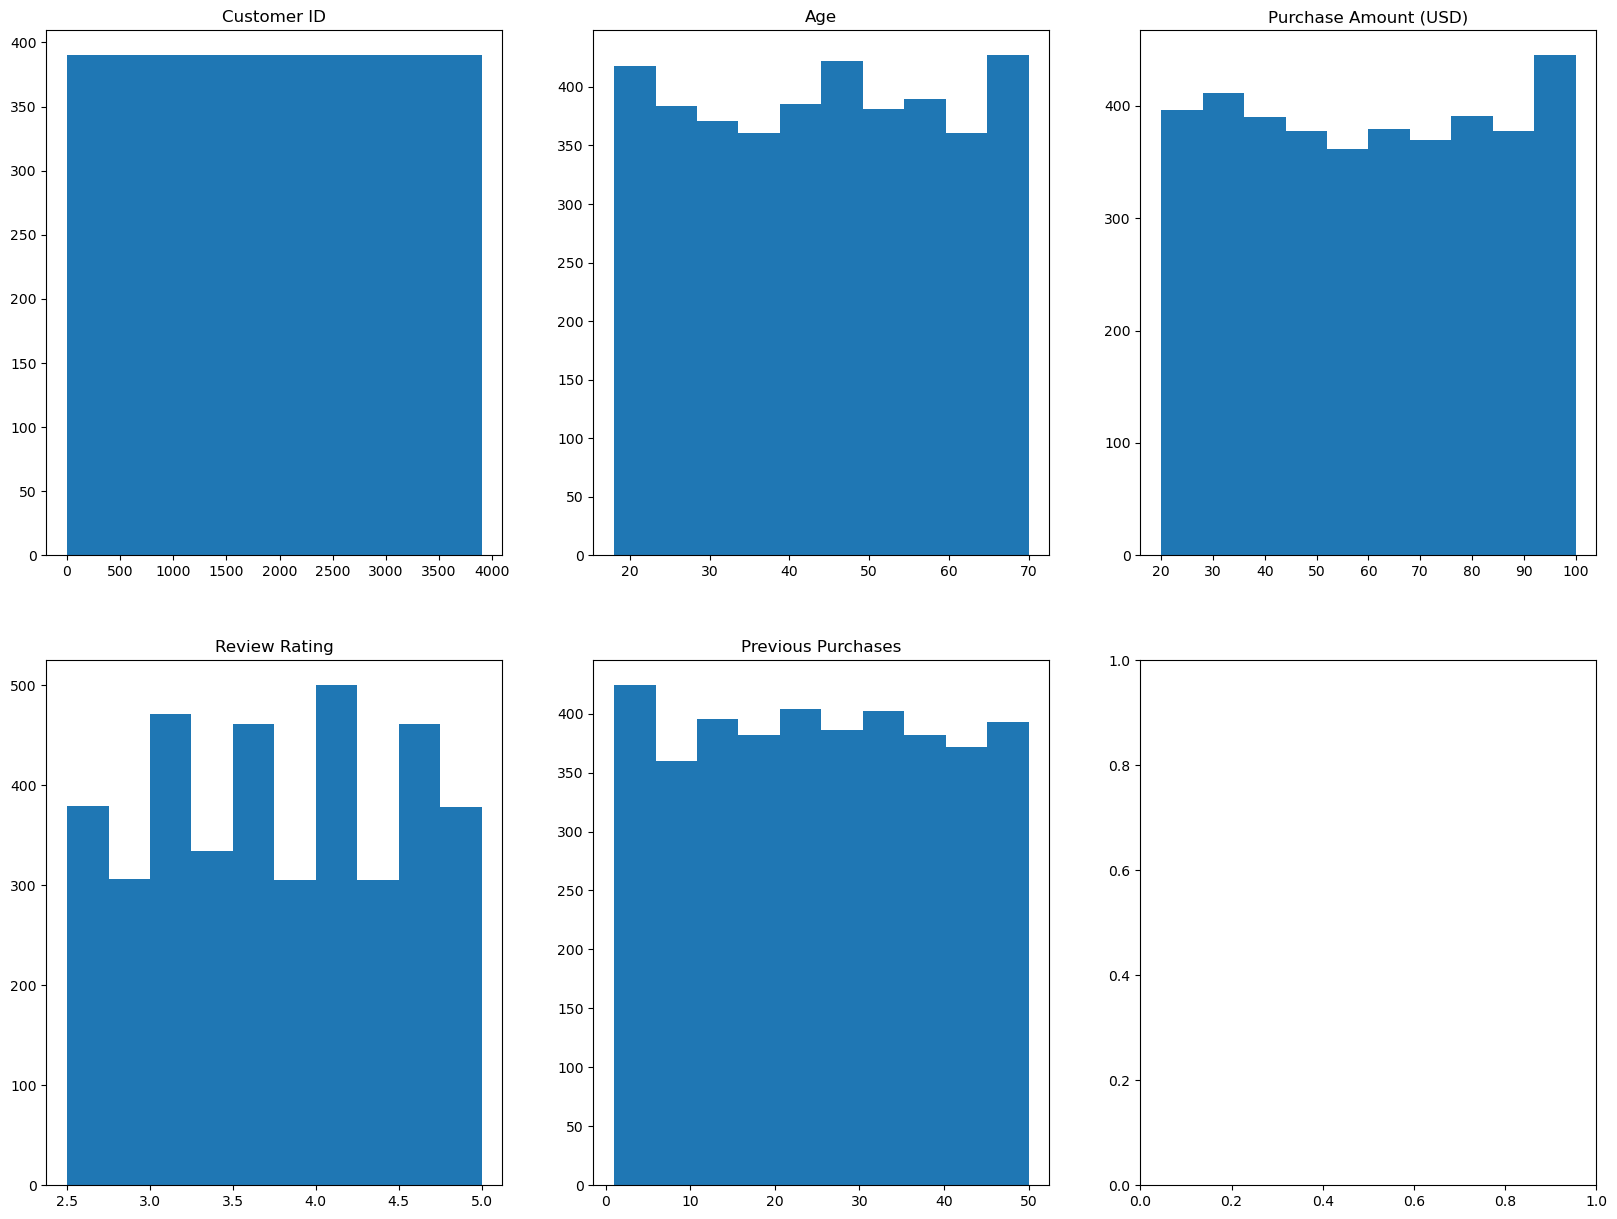

In [118]:
num_columns = ['Customer ID', 'Age','Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

#### Based on the plot above the data evenly distributed with no obvious outlier

### Analyzing the Subscription column

<Axes: title={'center': 'Subscription Status'}, xlabel='Subscription Status'>

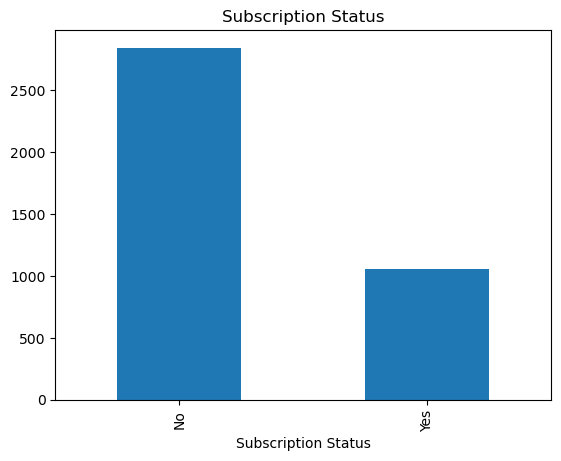

In [122]:
value_counts = df['Subscription Status'].value_counts()

value_counts.plot.bar(title = 'Subscription Status')

#### Data Cleaning

#### Before we will be able to apply machine learning techniques, we should prepare the dataset for processing:

#### 1. Convert columns with 'yes' and 'no' values to boolean columns;
#### 2. Convert categorical columns into dummy variables.

In [126]:
#using label encoder to change features to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

#### Dropping unwanted columns

In [129]:
df = df.drop(['Promo Code Used', 'Customer ID'], axis = 1)

In [131]:
df.head (3)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,37,1,2,1,33,16,0,7,3,6,1,2,1,1,13,5,3
1,1,1,23,1,44,18,0,12,3,6,1,0,1,1,1,1,3
2,32,1,11,1,53,20,2,12,1,6,1,1,2,1,22,2,6


# Milestone 3

### Data Processing

#### Splitting data into training and test set

In [136]:
from sklearn.model_selection import train_test_split

# Separate the target variable from the features
X = df.drop('Subscription Status', axis=1)
y = df['Subscription Status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#### Python dictionary for parameter grid

In [150]:
#creating a python dictionary for parameter grid

model_params = {

    'random_forest': { 
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators':[1,5,10]
            }
        },
    'decision_tree': { 
        'model': DecisionTreeClassifier(),
        'params': [{
            'criterion':['gini','entropy'], 'max_depth': np.arange (3, 15)}]
            },
    'logistic_regression': { 
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C':[1,5,10]
        }
    }
}

#### Creating a loop for Gridsearch to obtain the best model and parameters

In [144]:
#for loop for Gridsearch
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [146]:
df_result = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df_result

,model,best_score,best_params
0,svm,0.843590,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.811218,{'n_estimators': 5}
2,decision_tree,0.840705,"{'criterion': 'entropy', 'max_depth': 3}"
3,logistic_regression,0.843269,{'C': 5}


#### Finding the best 5 features

In [148]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Apply chi-square statistic selector to pick the five best features
selector = SelectKBest(chi2, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]
df_fn = pd.DataFrame(selected_feature_names)
print('The best five features are:', df_fn)
#print("Selected Features:", selected_feature_names)

The best five features are:                     0
0                 Age
1              Gender
2       Shipping Type
3    Discount Applied
4  Previous Purchases


### Precision, Recall, F1 and Confusion Matrix Logistic Regression

In [ ]:
from sklearn.metrics import classification_report

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Generate predictions on testing set
y_predLR = model.predict(X_test)

print(classification_report(y_test, y_predLR))

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predLR)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

### Summary for Milestone 3
#### - Based on the result above, the model with the highest accuracy scores are SVM and Logistic Regression
#### - The best five features for predicting subscription status are Age, Gender, Shipping Type, Discount Applied and Previous Purchases
